## Project 2:  Baltimore City 311 Calls Continued

* For project 2, I will expand upon my project 1 analysis of Baltimore City 311 Customer Service Requests for 2020. I will once again compare two zip codes in Baltimore city, the ones with the highest and lowest average adjusted gross incomes respectively, 21205 and 21210. This time, I will use census data to look at a per capita comparison of number of service requests. The census data also contains demographic information, so I can make and test predictions about why certain requests are made more than others. 

* My hypotheses are:

    * More 311 calls are made per capita from the 21210 zip code. I predict that if you’re in a higher SES zip code, you have the luxury of being more engaged.  I will look at total population, working aged adults, and retirees
    
    *  The distribution of calls per zip code is more highly skewed in the low SES.
    
    *  Requests are resolved more often in the 21210 zip code. Wealthier citizens have more sway.
    
    *  Requests by each zip code can be explained by differences in demographics:

        *  If a zip codes has higher rates of home ownership, I predict more 311 calls.

        *  If a zip code has a higher percentage of vacant units, I predict more 311 calls.

    * The top requests are different between the two zip codes. I predict certain requests will be more prevalent in each zip code, for example graffiti removal in 21205 and crosswalk request in 21210.


Baltimore has open data, which I discovered in the data source course material provided: https://data.baltimorecity.gov/datasets/311-customer-service-requests-2020-1/data. It is legal to access and free to download “with no legal encumbrances on use or reuse.” I have not encountered any previous exploratory data analysis. The data file is a csv file with 855445 rows and 23 columns of size 249 MB.


Maryland.gov has census data, which I was directed to: https://data.imap.maryland.gov/datasets/eb706b48117b43d482c63d02017fc3ff_1/data?geometry=-76.815%2C39.253%2C-76.351%2C39.346&orderBy=ZCTA5N&where=ZCTA5N%20%3E%3D%2021205%20AND%20ZCTA5N%20%3C%3D%2021210 . “The Data can be freely distributed as long as the metadata entry is not modified or deleted. Any data derived from the Data must acknowledge the State of Maryland in the metadata.” I have not encountered any previous exploratory data analysis of the type I'm doing with 311 calls. The data file is a csv file with 6 rows and 42 columns of size 3 KB.

### Step 1:  Import libraries

In [712]:
import pandas as pd   
import matplotlib.pyplot as plt
from IPython.display import Image
import numpy as np
import requests
from io import StringIO

### Step 2:  Read in the data

In [727]:
#This code Professor Wan suggested is not working for the large 311 data file.  Working on a solution.  In the meantime, I 
#directly read in the data as a local file from my computer.

# orig_url_311='https://drive.google.com/file/d/1Z9EvkcxBtJQu1vXnUcTKXiznJi8g6K6p/view?usp=sharing'
# orig_url_census='https://drive.google.com/file/d/1ERLDKsZxjK5WvhWj2pX80iGYde0pLN_q/view?usp=sharing'

# file_id_311 = orig_url_311.split('/')[-2]
# file_id_census = orig_url_census.split('/')[-2]

# dwn_url_311='https://drive.google.com/uc?export=download&id=' + file_id_311
# dwn_url_census='https://drive.google.com/uc?export=download&id=' + file_id_census

# url_311 = requests.get(dwn_url_311).text
# url_census = requests.get(dwn_url_census).text

# csv_raw_311 = StringIO(url_311)
# csv_raw_census = StringIO(url_census)

# df_311 = pd.read_csv(csv_raw_311,low_memory=False)
# df_census = pd.read_csv(csv_raw_census)

In [729]:
df_311=pd.read_csv('311_Customer_Service_Requests_2020.csv',low_memory=False)    #311 data
df_311.head()

OBJECTID          SRRecordID ServiceRequestNum                      SRType  \
0         1  5004M00000bKbwqQAC       20-00000004       TRS-Parking Complaint   
1         2  5004M00000bKbwRQAS       20-00000001               HLTH-EV Noise   
2         3  5004M00000bKbwWQAS       20-00000002               HLTH-EV Noise   
3         4  5004M00000bKbx0QAC       20-00000005  TRT-Traffic Signal Repairs   
4         5  5004M00000bKbx5QAC       20-00000006     HLTH-Animal Barking Dog   

  MethodReceived          CreatedDate SRStatus           StatusDate  \
0            API  2020/01/01 00:31:28   Closed  2020/01/01 08:43:06   
1            API  2020/01/01 00:10:40   Closed  2020/01/02 10:59:38   
2            API  2020/01/01 00:17:35   Closed  2020/01/02 11:04:32   
3          Phone  2020/01/01 00:40:08   Closed  2020/01/01 06:00:57   
4            API  2020/01/01 00:40:16   Closed  2020/01/01 07:21:25   

               DueDate            CloseDate  ...  \
0  2020/01/02 00:31:28  2020/01/01 08:38:59  ...   
1  2020/01/29 00:10:40  2020/01/02 10:59:40  ...   
2  2020/01/29 00:17:35  2020/01/02 11:04:32  ...   
3  2020/01/01 12:40:08  2020/01/01 06:00:59  ...   
4  2020/01/15 00:40:15  2020/01/01 07:21:26  ...   

                                             Outcome  \
0                        Work could not be completed   
1                                     Work completed   
2                                     Work completed   
3  SR closed by agency-specific work management s...   
4                                     Work completed   

                                             Address ZipCode  \
0      MAISEL ST & SIDNEY AVE, Baltimore City, 21230   21230   
1            4118 KENSHAW AVE, Baltimore City, 21215   21215   
2                 3816 2ND ST, Baltimore City, 21225   21225   
3  SIGNAL 625 - EUTAW / MC MECHEN, Baltimore City...   21217   
4           1463 STEVENSON ST, Baltimore City, 21230   21230   

                   Neighborhood CouncilDistrict PoliceDistrict PolicePost  \
0                      Westport            10.0       Southern        NaN   
1          Reisterstown Station             5.0   Northwestern        NaN   
2                      Brooklyn            10.0       Southern        NaN   
3                  Madison Park            11.0        Central        NaN   
4  Locust Point Industrial Area            11.0       Southern        NaN   

    Latitude  Longitude                                GeoLocation  
0  39.261371 -76.633992  (39.261371260753535, -76.633991886946190)  
1  39.354217 -76.701708  (39.354216993507480, -76.701708169404700)  
2  39.235762 -76.610055  (39.235761907349570, -76.610054750941340)  
3  39.306361 -76.629082  (39.306361269504094, -76.629082469979600)  
4  39.271050 -76.597753  (39.271050481142390, -76.597753436175440)  

[5 rows x 23 columns]

In [730]:
df_census=pd.read_csv('Maryland_Census_Data_-_ZIP_Code_Tabulation_Areas_(ZCTAs) (1).csv')   #census data for zips 21205 to 21210
df_census.head()

OBJECTID_1  ZCTA5CE10  FIRST_STAT  FIRST_GEOI FIRST_CLAS FIRST_MTFC  \
0         237      21205          24     2421205         B5      G6350   
1         238      21206          24     2421206         B5      G6350   
2         239      21207          24     2421207         B5      G6350   
3         241      21209          24     2421209         B5      G6350   
4         242      21210          24     2421210         B5      G6350   

  FIRST_FUNC  ZCTA5N  STATE  AREALAND  ...  VACNS  PVACNS  PHOWN  PWOMORT  \
0          S   21205     24   5304530  ...   1436    20.3   23.0     43.8   
1          S   21206     24  18667230  ...   1963     9.0   49.5     18.3   
2          S   21207     24  26710727  ...   1494     7.4   48.0     19.6   
3          S   21209     24  18354471  ...    547     4.5   41.8     29.8   
4          S   21210     24   8579050  ...    395     6.6   38.9     32.2   

   PRENT  PLT18SP                                         REPORT_2_P  \
0   59.0     78.2  http://mdpgis.mdp.state.md.us/Census2010/PDF/0...   
1   39.4     56.4  http://mdpgis.mdp.state.md.us/Census2010/PDF/0...   
2   40.2     56.1  http://mdpgis.mdp.state.md.us/Census2010/PDF/0...   
3   40.5     17.6  http://mdpgis.mdp.state.md.us/Census2010/PDF/0...   
4   42.7     14.3  http://mdpgis.mdp.state.md.us/Census2010/PDF/0...   

                                          REPORT_9_P  Shape_Length  \
0  http://mdpgis.mdp.state.md.us/census2010/PDF/0...  26747.726316   
1  http://mdpgis.mdp.state.md.us/census2010/PDF/0...  32883.336752   
2  http://mdpgis.mdp.state.md.us/census2010/PDF/0...  44426.114052   
3  http://mdpgis.mdp.state.md.us/census2010/PDF/0...  39985.367886   
4  http://mdpgis.mdp.state.md.us/census2010/PDF/0...  27928.329905   

     Shape_Area  
0  8.870648e+06  
1  3.124944e+07  
2  4.483139e+07  
3  3.080389e+07  
4  1.437865e+07  

[5 rows x 42 columns]

### Step 3a:  Explore the 311 dataframe

In [731]:
df_311.shape                                 #display the number of rows and columns of data for 311 df


(855445, 23)

In [732]:
df_311.columns                               #display the column headers for 311 df

Index(['OBJECTID', 'SRRecordID', 'ServiceRequestNum', 'SRType',
       'MethodReceived', 'CreatedDate', 'SRStatus', 'StatusDate', 'DueDate',
       'CloseDate', 'Agency', 'LastActivity', 'LastActivityDate', 'Outcome',
       'Address', 'ZipCode', 'Neighborhood', 'CouncilDistrict',
       'PoliceDistrict', 'PolicePost', 'Latitude', 'Longitude', 'GeoLocation'],
      dtype='object')

I decided to only keep the following columns:
* SRType :  service request type
* SRStatus:  status of the request
* Agency: which city agency the request belonged to
* Outcome:  result of the request
* ZipCode:  zip code the request came from
* Neighborhood: neighborhood the request came fom
* CouncilDistrict:  council district the request came from
* PoliceDistrict:  police district the request came from
* GeoLocation:  latitude and longitude of request

In [733]:
#reassign the 311 df with only columns listed above

df_311=pd.read_csv(
    '311_Customer_Service_Requests_2020.csv',low_memory=False,
    usecols=['SRType','SRStatus','Agency','Outcome',
             'ZipCode','Neighborhood','CouncilDistrict','PoliceDistrict','GeoLocation'])

df_311.head()         #display the first 5 rows

SRType SRStatus          Agency  \
0       TRS-Parking Complaint   Closed  Transportation   
1               HLTH-EV Noise   Closed          Health   
2               HLTH-EV Noise   Closed          Health   
3  TRT-Traffic Signal Repairs   Closed  Transportation   
4     HLTH-Animal Barking Dog   Closed          Health   

                                             Outcome ZipCode  \
0                        Work could not be completed   21230   
1                                     Work completed   21215   
2                                     Work completed   21225   
3  SR closed by agency-specific work management s...   21217   
4                                     Work completed   21230   

                   Neighborhood  CouncilDistrict PoliceDistrict  \
0                      Westport             10.0       Southern   
1          Reisterstown Station              5.0   Northwestern   
2                      Brooklyn             10.0       Southern   
3                  Madison Park             11.0        Central   
4  Locust Point Industrial Area             11.0       Southern   

                                 GeoLocation  
0  (39.261371260753535, -76.633991886946190)  
1  (39.354216993507480, -76.701708169404700)  
2  (39.235761907349570, -76.610054750941340)  
3  (39.306361269504094, -76.629082469979600)  
4  (39.271050481142390, -76.597753436175440)

In [734]:
df_311.info()       #check the column data types and other information in the 311 df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855445 entries, 0 to 855444
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   SRType           855445 non-null  object 
 1   SRStatus         855445 non-null  object 
 2   Agency           853339 non-null  object 
 3   Outcome          462528 non-null  object 
 4   ZipCode          555666 non-null  object 
 5   Neighborhood     544966 non-null  object 
 6   CouncilDistrict  545094 non-null  float64
 7   PoliceDistrict   545064 non-null  object 
 8   GeoLocation      555925 non-null  object 
dtypes: float64(1), object(8)
memory usage: 58.7+ MB


In [735]:
df_311.isnull().sum()    #check the number of missing values per column in the 311 df



SRType                  0
SRStatus                0
Agency               2106
Outcome            392917
ZipCode            299779
Neighborhood       310479
CouncilDistrict    310351
PoliceDistrict     310381
GeoLocation        299520
dtype: int64

In [736]:
df_311.nunique()         #find the number of unique entries per column

SRType                311
SRStatus               11
Agency                 18
Outcome                40
ZipCode                66
Neighborhood          278
CouncilDistrict        14
PoliceDistrict         18
GeoLocation        197975
dtype: int64

In [737]:
df_311['Agency'].value_counts()   #display the count for each of the unique entries in the Agency column

#Citation:  https://www.w3resource.com/pandas/series/series-value_counts.php

Call Center           317344
Solid Waste           275626
Transportation         77491
Housing                67906
Water Wastewater       37996
Finance                20253
BGE                    20250
Health                 18573
Recreation & Parks     11271
Fire Department         4370
Parking Authority        933
Liquor Board             836
Public Works             371
Mayor's Office            52
BCIT                      29
General Services          19
Police Department         16
City Council               3
Name: Agency, dtype: int64

In [738]:
df_311['SRType'].value_counts().head(20)  #display the count for the 20 most numerous entries in the SRType column

ECC-Information Request                  296965
SW-Rat Rubout Proactive                  117726
HCD-Sanitation Property                   32433
SW-Mixed Refuse                           25902
SW-HGW                                    23269
TRS-Parking Complaint                     21013
SW-Dirty Alley                            18141
BGE-StLight(s) Out                        16143
TRS-48 Hour Parking/Abandoned Vehicle     14880
SW-Dirty Street                           13269
ECC-Vehicle Look Up                       12920
SW-Bulk Scheduled                         12612
SW-Recycling                              12381
HCD-Illegal Dumping                       11614
WW-Water Leak (Exterior)                   9276
SW-Cleaning                                8892
TRM-Pickup Pothole                         7977
SW-Municipal Trash Can Concern             7604
WW-Sewer Water In Basement                 7072
SW-Boarding                                5585
Name: SRType, dtype: int64

In [739]:
df_311.mode()             #find the most common element in each column

SRType SRStatus       Agency         Outcome ZipCode  \
0  ECC-Information Request   Closed  Call Center  Work completed   21224   

  Neighborhood  CouncilDistrict PoliceDistrict  \
0     Downtown              9.0   Northeastern   

                                 GeoLocation  
0  (39.291662025556320, -76.610555003610260)

### A closer look at the modes

*  Zip Code 21224 and what they're contacting 311 about:

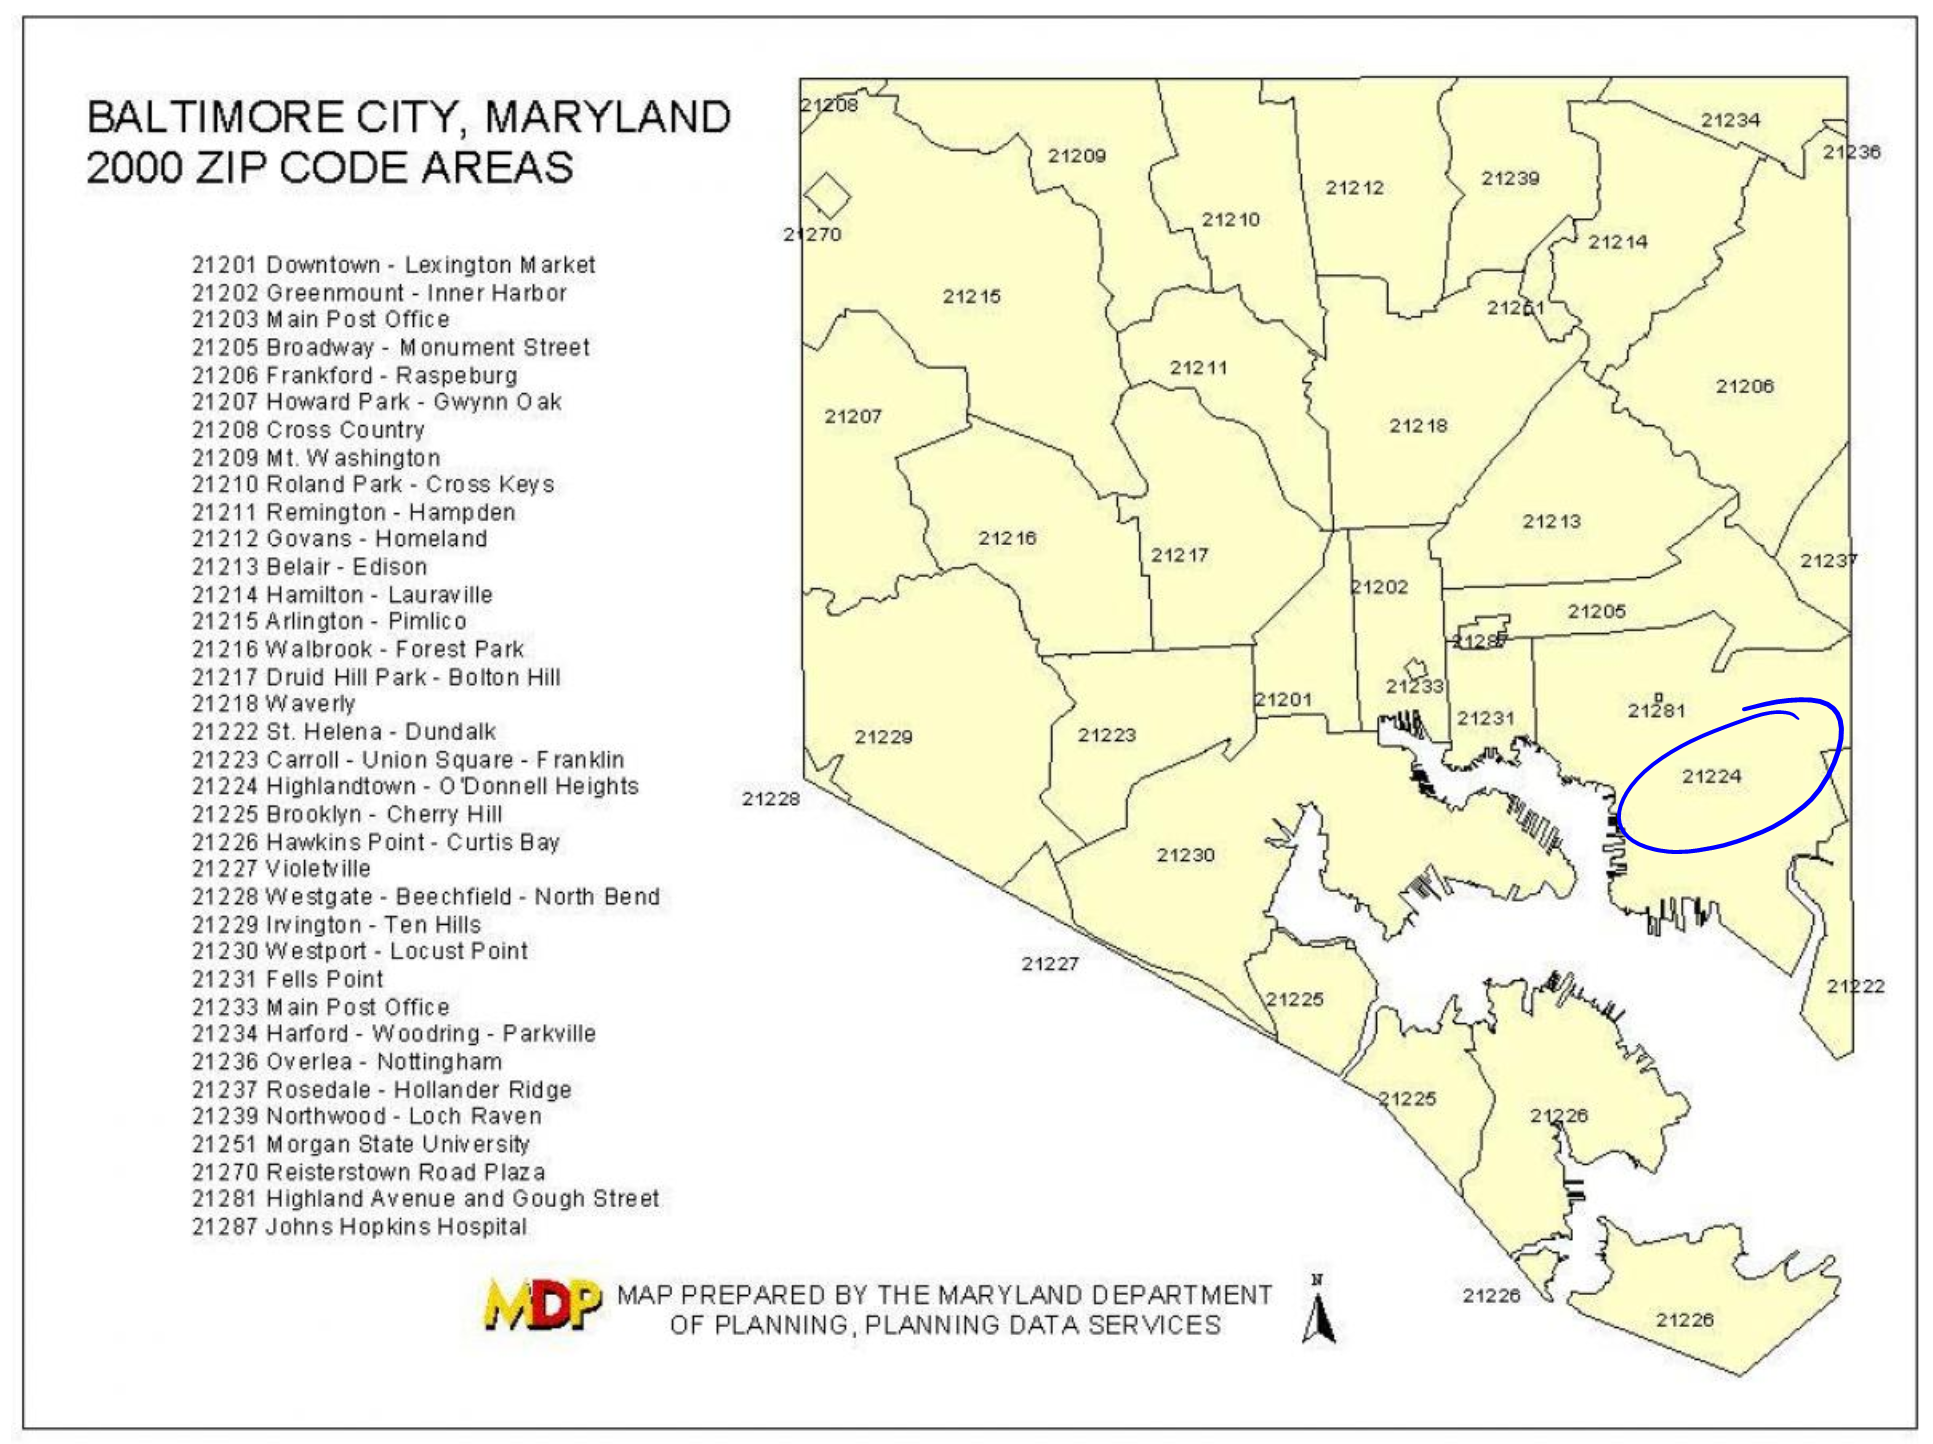

In [740]:
Image(filename='zips.png',width=600, height=600)


In [741]:
df_311.loc[df_311['ZipCode'] == '21224'].value_counts('SRType')    #list value counts for service requests from 21224

SRType
SW-Rat Rubout Proactive                        8349
TRS-Parking Complaint                          3325
SW-Mixed Refuse                                2944
SW-Dirty Alley                                 2770
HCD-Sanitation Property                        2344
                                               ... 
FCPF-Trial Request-Commercial Truck               1
SW-Water Way Cleaning                             1
HCD-Dirty Street RP (INTERNAL)                    1
TRM-Bridge Concern                                1
FCPF-Vehicle Owner Death/Funeral Procession       1
Length: 261, dtype: int64

*  Neighboorhood "Downtown" and what they're contacting 311 about"

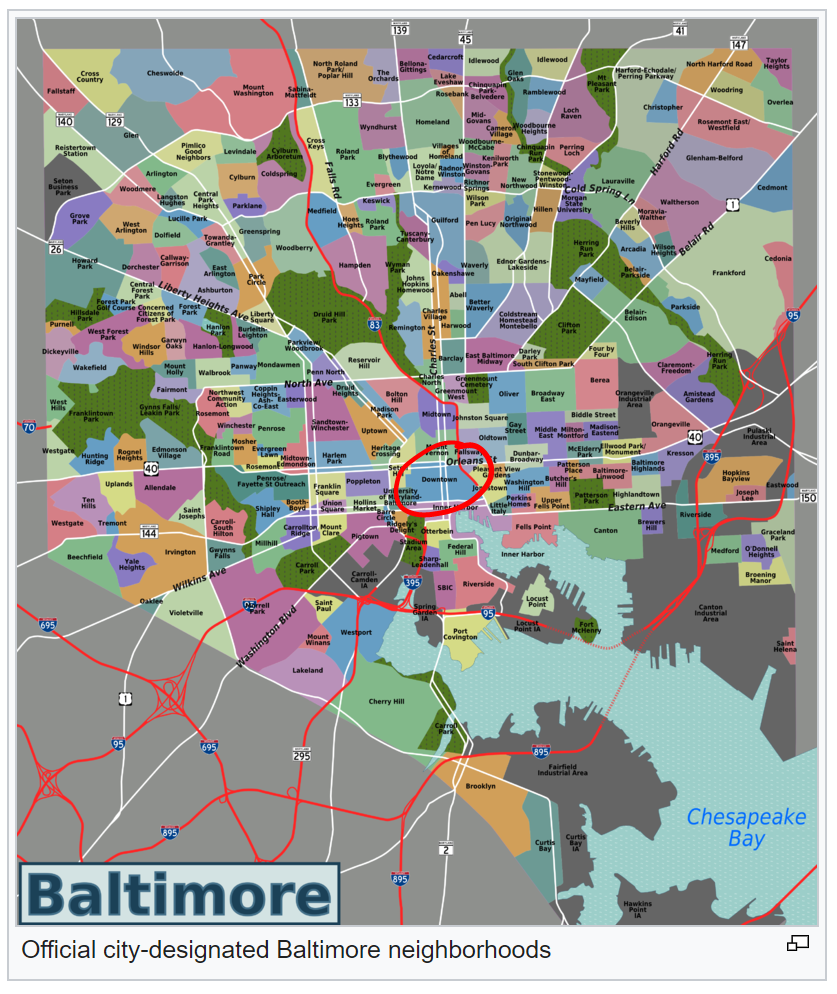

In [742]:
Image(filename='neighboorhood.png',width=700, height=700)

In [743]:
df_311.loc[df_311['Neighborhood'] == 'Downtown'].value_counts('SRType')    #list value counts for service requests from Downtown



SRType
FCPF-Trial Request-Red Light         4020
FCPF-Trial Request-Parking           2779
FCPF-Trial Request-Speed Citation    2393
FCPF-Other                           1035
FCPF-Payments                         810
                                     ... 
SW-Appliance (White Goods)              1
TRT-New Stop Sign                       1
ECC-Salesforce 3-1-1 Issue              1
SW-Fire Debris Removal                  1
RP-Street Lighting Repairs              1
Length: 224, dtype: int64

*  Council District 9 and what they're contacting 311 about

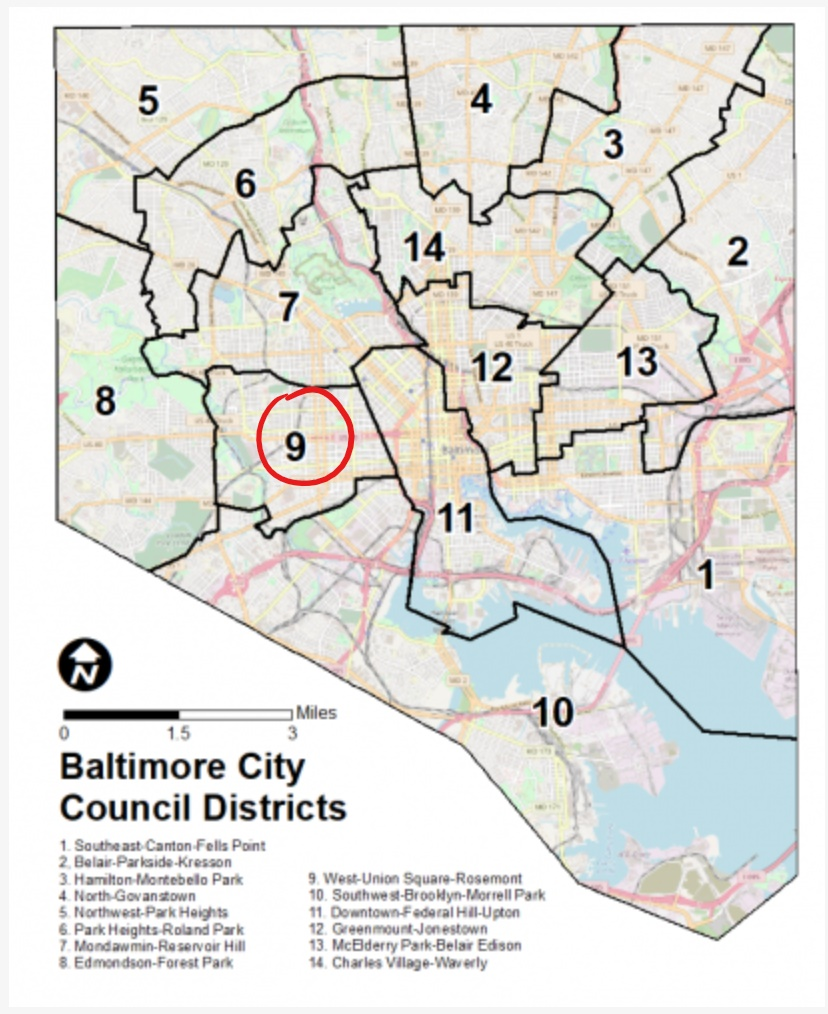

In [744]:
Image(filename='council.jpg',width=300, height=300)

In [745]:
df_311.loc[df_311['CouncilDistrict'] == 9.0].value_counts('SRType')    #list value counts for service requests from 
                                                                       #Council District 9

SRType
SW-Rat Rubout Proactive                     14137
SW-HGW                                       6245
HCD-Sanitation Property                      5163
SW-Cleaning                                  2662
SW-Dirty Alley                               2353
                                            ...  
TRC-Conduit Restoration                         1
TRM-(ADA) Sidewalk Ramp Concern (Repair)        1
TRM-Steel Plate Repair                          1
ECC-BCIT Service Desk                           1
WW-Waterway Pollution Investigation             1
Length: 256, dtype: int64

*  Northeast Police District and what they're calling 311 about

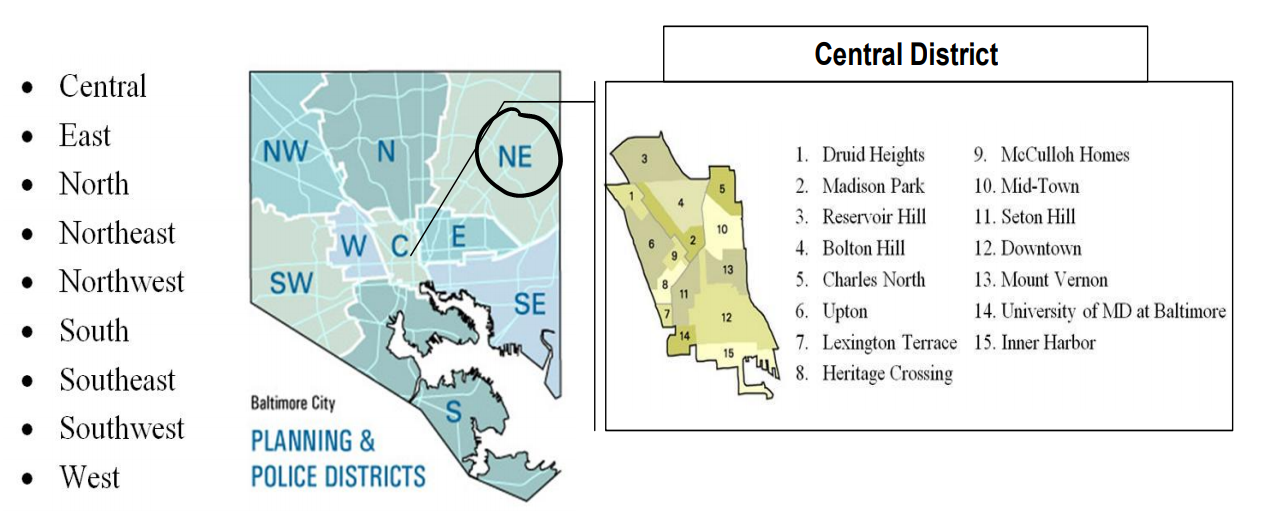

In [746]:
Image(filename='district.png',width=700, height=700)

In [747]:
df_311.loc[df_311['PoliceDistrict'] == 'Northeastern'].value_counts('SRType')    #list value counts for service requests from 
                                                                                 #Police District 9


SRType
SW-Rat Rubout Proactive                       18478
SW-Mixed Refuse                                7144
HCD-Sanitation Property                        4811
SW-Recycling                                   3765
SW-Bulk Scheduled                              3716
                                              ...  
HLTH-EV Public Swimming Pool/Spa Complaint        1
FCCS-ORCC Reversals                               1
EOC-COVID 19 Donations                            1
ECC-Language Line                                 1
FCCS-Metered Water                                1
Length: 264, dtype: int64

*  Geographic location (39.291662025556320, -76.610555003610260) and what they're contacting 311 about

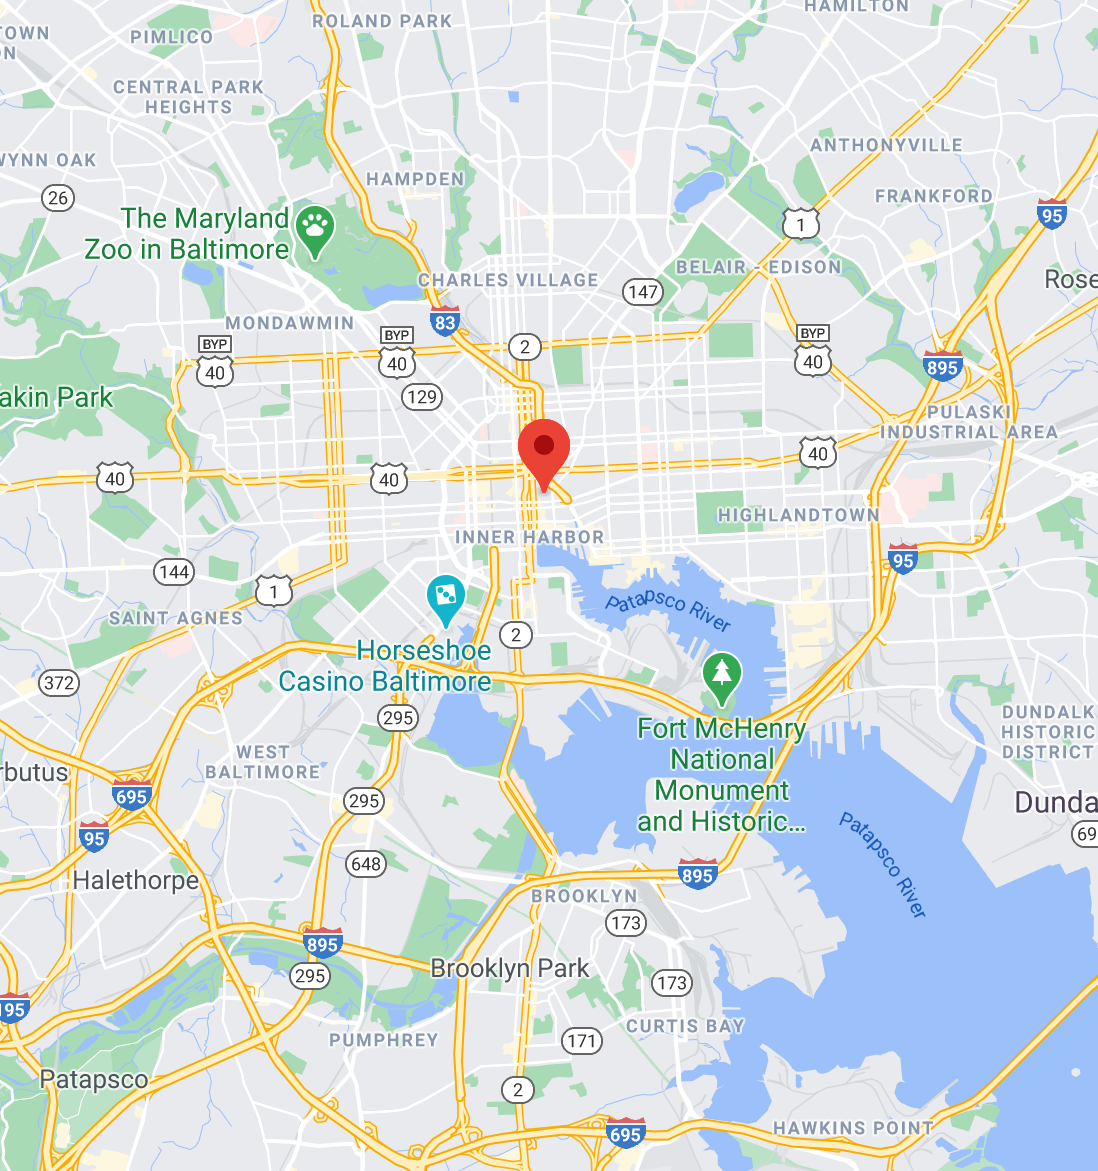

In [748]:
Image(filename='geoloc.png',width=500, height=500)

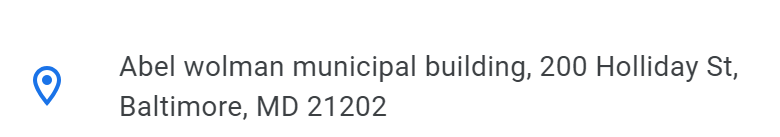

In [749]:
Image(filename='geo.png',width=500, height=500)

*  This is a city municipal building where residents can come to pay their property taxes, parking fines, and metered water bills.

In [750]:
#list value counts for service requests from mode geographic location

df_311.loc[df_311['GeoLocation'] == '(39.291662025556320, -76.610555003610260)'].value_counts('SRType')    


SRType
FCPF-Trial Request-Red Light                   4014
FCPF-Trial Request-Parking                     2768
FCPF-Trial Request-Speed Citation              2393
FCPF-Other                                     1020
FCPF-Transfer of Liability                      793
TRA-Ombudsman Review                            792
FCPF-Payments                                   781
FCCS-Parking Fines Refunds                      569
FCCS-Other                                      481
FCPF-Certified Mail                             392
FCPF-Stolen Vehicle/Tags                        345
FCCS-ORCC Reversals                             308
FCPF-Makes Differ                               162
FCCS-Personal Property Tax                      153
FCCS-City Dynamics Request                      143
FCPF-Collection Agency                          127
FCPF-VR119-Mail                                 122
FCPF-Vehicle Owner Death/Funeral Procession      86
FCCS-Metered Water                               79
FCCS-

*  Makes sense in terms of the location

Citations:
* https://maps-baltimore.com/baltimore-city-zip-code-map
* https://en.wikipedia.org/wiki/List_of_Baltimore_neighborhoods
* https://jewishmuseummd.org/voter-education-baltimore-city-council/
* https://www.cna.org/CNA_files/PDF/IRB_BPD_Final-101711.pdf
* https://www.google.com/maps/place/39%C2%B017'30.0%22N+76%C2%B036'38.0%22W/@39.2916661,-76.6127437,17z/data=!3m1!4b1!4m5!3m4!1s0x0:0x0!8m2!3d39.291662!4d-76.610555
* https://stackoverflow.com/questions/10628262/inserting-image-into-ipython-notebook-markdown#:~:text=1)%20Simply%20create%20an%20empty,insert%20the%20image%20then%20appears.&text=3)%20Then%20execute%20the%20Markdown%20cell%20by%20hitting%20Shift%2DEnter


### Step 3b:  Explore the census dataframe

In [751]:
df_census.shape                             #display the number of rows and columns of data for census df

(5, 42)

In [752]:
df_census.info()                            #check the column data types and other information in the census df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 42 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OBJECTID_1    5 non-null      int64  
 1   ZCTA5CE10     5 non-null      int64  
 2   FIRST_STAT    5 non-null      int64  
 3   FIRST_GEOI    5 non-null      int64  
 4   FIRST_CLAS    5 non-null      object 
 5   FIRST_MTFC    5 non-null      object 
 6   FIRST_FUNC    5 non-null      object 
 7   ZCTA5N        5 non-null      int64  
 8   STATE         5 non-null      int64  
 9   AREALAND      5 non-null      int64  
 10  AREAWATR      5 non-null      int64  
 11  POP100        5 non-null      int64  
 12  HU100         5 non-null      int64  
 13  NHW           5 non-null      int64  
 14  NHB           5 non-null      int64  
 15  NHAI          5 non-null      int64  
 16  NHA           5 non-null      int64  
 17  NHNH          5 non-null      int64  
 18  NHO           5 non-null      int6

In [753]:
df_census.columns                           #display the column headers for the census df

Index(['OBJECTID_1', 'ZCTA5CE10', 'FIRST_STAT', 'FIRST_GEOI', 'FIRST_CLAS',
       'FIRST_MTFC', 'FIRST_FUNC', 'ZCTA5N', 'STATE', 'AREALAND', 'AREAWATR',
       'POP100', 'HU100', 'NHW', 'NHB', 'NHAI', 'NHA', 'NHNH', 'NHO', 'NHT',
       'HISP', 'PNHW', 'PNHB', 'PNHAI', 'PNHA', 'PNHNH', 'PNHO', 'PNHT',
       'PHISP', 'POP65_', 'PCTPOP65_', 'MEDAGE', 'VACNS', 'PVACNS', 'PHOWN',
       'PWOMORT', 'PRENT', 'PLT18SP', 'REPORT_2_P', 'REPORT_9_P',
       'Shape_Length', 'Shape_Area'],
      dtype='object')

### I decided to only keep the following columns:
*  ZCTA5N:  Zip Code Number
*  AREALAND:  Land area (m^2)
*  AREAWATR:  Water area (m^2)
*  POP100:  Total population
*  HU100:  Total housing units
*  PCTPOP65_:  Percent over 65
*  MEDAGE:  Median age
*  PVACNS:  Percent vacant units
*  PHOWN:  Homeownership rate
*  PRENT:  Percent rent
*  PLT18SP:  Percent under 18

In [754]:
#reassign the census df with only columns listed above

df_census=pd.read_csv(
    'Maryland_Census_Data_-_ZIP_Code_Tabulation_Areas_(ZCTAs) (1).csv',
    usecols=['ZCTA5N','AREALAND','AREAWATR','POP100','HU100',
             'PCTPOP65_','MEDAGE','PVACNS','PHOWN','PRENT','PLT18SP'])

df_census

ZCTA5N  AREALAND  AREAWATR  POP100  HU100  PCTPOP65_  MEDAGE  PVACNS  \
0   21205   5304530         0   16146   7059       10.1    30.6    20.3   
1   21206  18667230      3869   50846  21762        9.6    35.4     9.0   
2   21207  26710727     81229   48133  20272       13.7    38.7     7.4   
3   21209  18354471    101926   26465  12054       15.7    37.7     4.5   
4   21210   8579050      5635   14292   5949       13.9    31.6     6.6   

   PHOWN  PRENT  PLT18SP  
0   23.0   59.0     78.2  
1   49.5   39.4     56.4  
2   48.0   40.2     56.1  
3   41.8   40.5     17.6  
4   38.9   42.7     14.3

In [755]:
#I only need the 21205 and 21210 data

df_census.drop(df_census[(df_census['ZCTA5N'] < 21210) & (df_census['ZCTA5N'] > 21205)].index, inplace=True)
df_census.reset_index(inplace = True, drop = True)
df_census

ZCTA5N  AREALAND  AREAWATR  POP100  HU100  PCTPOP65_  MEDAGE  PVACNS  \
0   21205   5304530         0   16146   7059       10.1    30.6    20.3   
1   21210   8579050      5635   14292   5949       13.9    31.6     6.6   

   PHOWN  PRENT  PLT18SP  
0   23.0   59.0     78.2  
1   38.9   42.7     14.3

### Step 4:  Test the hypothesis list above which focus on two zip codes, one with the highest SES to one with lowest SES

* According to https://www.zipdatamaps.com/economics/income/agi/metro/poorest-zipcodes-in-metro-baltimore, the zip code in Baltimore City with the lowest average adujusted gross income ($28,110) is **21205**.  

* According to https://www.zipdatamaps.com/economics/income/agi/state/wealthiest-zipcodes-in-maryland, the zip code in Baltimore City with the highest adjusted gross income ($183,890) is **21210**.



### Make one data frame of the data for the two zip codes only

In [756]:
#locate all rows that have zip code 21210 or 21205 and store in a new df

df_311_comb=df_311.loc[(df_311['ZipCode'] == '21210') | (df_311['ZipCode']=='21205')]   
                                                                        
df_311_comb.sample(10)                         #display a sample of 10 service requests

SRType SRStatus            Agency  \
29889              TRS-Parking Complaint   Closed    Transportation   
461984                   SW-Mixed Refuse   Closed       Solid Waste   
854225                BGE-StLight(s) Out   Closed               BGE   
397481          WW-Water Leak (Exterior)   Closed  Water Wastewater   
718575                            SW-HGW   Closed       Solid Waste   
572549           SW-Rat Rubout Proactive   Closed       Solid Waste   
211744                       SW-Cleaning   Closed       Solid Waste   
93414   FIR-Fire Code Inspection Request   Closed   Fire Department   
1968             SW-Rat Rubout Proactive   Closed       Solid Waste   
442667                            SW-HGW   Closed       Solid Waste   

                                                  Outcome ZipCode  \
29889                                      Work completed   21205   
461984                                     Work completed   21205   
854225  SR closed by agency-specific work management s...   21210   
397481  SR closed by agency-specific work management s...   21210   
718575  SR closed by agency-specific work management s...   21205   
572549                                     Work completed   21205   
211744  SR closed by agency-specific work management s...   21205   
93414                                      Work completed   21205   
1968                                                  NaN   21205   
442667  SR closed by agency-specific work management s...   21205   

           Neighborhood  CouncilDistrict PoliceDistrict  \
29889       Orangeville             13.0        Eastern   
461984  Madison-Eastend             13.0   Southeastern   
854225      Roland Park             14.0       Northern   
397481        Wyndhurst              6.0       Northern   
718575   McElderry Park             13.0   Southeastern   
572549       Gay Street             12.0        Eastern   
211744  Milton-Montford             13.0        Eastern   
93414       Middle East             13.0        Eastern   
1968               CARE             13.0        Eastern   
442667    Biddle Street             13.0        Eastern   

                                      GeoLocation  
29889   (39.301942732906410, -76.559655978665490)  
461984  (39.299118616528276, -76.575237395276570)  
854225  (39.341106488515510, -76.630134814829280)  
397481  (39.356491732807300, -76.634360466151400)  
718575  (39.298599763434190, -76.577479999045040)  
572549  (39.299298000757040, -76.597435771616840)  
211744  (39.300597962802610, -76.583253019792350)  
93414   (39.302603144917410, -76.591988744512010)  
1968    (39.296446006905754, -76.585509495251390)  
442667  (39.303518985489930, -76.582381409717670)

### Hypothesis 1:  There are more 311 calls per capita in the high SES

In [757]:
a=len(df_311_comb.loc[df_311_comb['ZipCode']=='21205'])/df_census['POP100'][0]    #number of calls per zip code divided by 
b=len(df_311_comb.loc[df_311_comb['ZipCode']=='21210'])/df_census['POP100'][1]    #the population for that zip code
print("311 Requests per person in 21205:  ",a)
print("311 Requests per person in 21210:  ",b)


311 Requests per person in 21205:   1.2049424005945746
311 Requests per person in 21210:   0.31731038343129025


In [758]:
#number of calls per zip code divided by (percent of population between 18 and 65 as a decimal, multiplied by population)

c=len(df_311_comb.loc[df_311_comb['ZipCode']=='21205'])/(df_census['POP100'][0]*(100-df_census['PCTPOP65_'][0]+df_census['PLT18SP'][0])/100)
d=len(df_311_comb.loc[df_311_comb['ZipCode']=='21210'])/(df_census['POP100'][1]*(100-df_census['PCTPOP65_'][1]+df_census['PLT18SP'][1])/100)
print("311 Requests per working aged adult in 21205:  ",c)
print("311 Requests per working aged adult in 21210:  ",d)

311 Requests per working aged adult in 21205:   0.7168009521680989
311 Requests per working aged adult in 21210:   0.3160461986367433


In [759]:
#number of calls per zip code divided by (percent of population over 65, multiplied by population)

e=len(df_311_comb.loc[df_311_comb['ZipCode']=='21205'])/(df_census['POP100'][0]*(df_census['PCTPOP65_'][0]/100))
f=len(df_311_comb.loc[df_311_comb['ZipCode']=='21210'])/(df_census['POP100'][1]*(df_census['PCTPOP65_'][1]/100))
print("311 Requests retired age adult in 21205:  ",e)
print("311 Requests retired age adult in 21210:  ",f)

311 Requests retired age adult in 21205:   11.930122778164105
311 Requests retired age adult in 21210:   2.282808513894174


In [760]:
#make a dataframe of the above inforamtion

data=[['21205',a,c,e],['21210',b,d,f]]
df=pd.DataFrame(data,columns=['Zip Code','Requests per person','Requests per working aged adult','Requests per retiree'])
df

Zip Code  Requests per person  Requests per working aged adult  \
0    21205             1.204942                         0.716801   
1    21210             0.317310                         0.316046   

   Requests per retiree  
0             11.930123  
1              2.282809

<AxesSubplot:xlabel='Zip Code'>

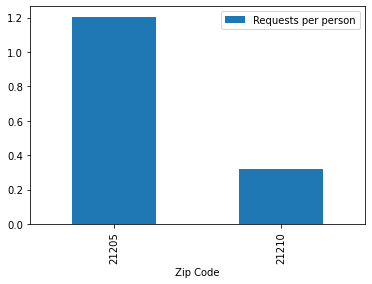

In [761]:
df.plot.bar(x='Zip Code',y='Requests per person')                           #plot requests per person comparison

<AxesSubplot:xlabel='Zip Code'>

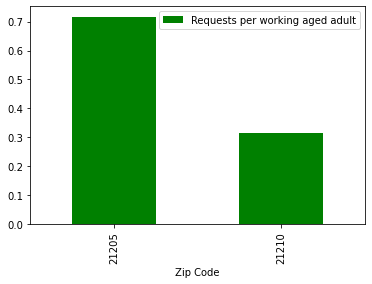

In [762]:
df.plot.bar(x='Zip Code',y='Requests per working aged adult',color='green')  #plot requests per adult comparison

<AxesSubplot:xlabel='Zip Code'>

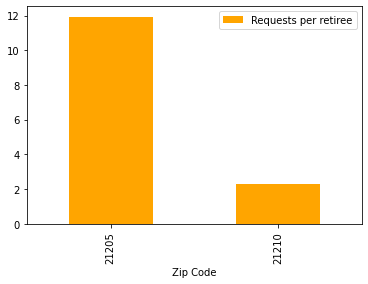

In [763]:
df.plot.bar(x='Zip Code',y='Requests per retiree',color='orange')          #plot requests per retiree comparison

* Hypothesis is not supported

### Hypothesis 2:  There is greater uniqueness of geographic location of requests in the high SES

In [764]:
g=df_311_comb.loc[df_311_comb['ZipCode']=='21205'].value_counts('GeoLocation')   #find the value counts for each geo location 
                                                                                 #in 21205

In [765]:
h=df_311_comb.loc[df_311_comb['ZipCode']=='21210'].value_counts('GeoLocation')   #find the value counts for each geo location 
                                                                                 #in 21210


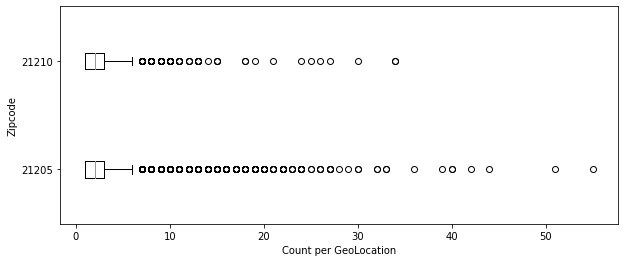

In [766]:
data=[g,h]                                                     #make a box plot to compare spreads

fig, ax = plt.subplots(figsize=(10,4))
ax.boxplot(data, vert=False)
ax.set_xlabel('Count per GeoLocation')
ax.set_ylabel('Zipcode')
ax.set_yticks([1,2])
ax.set_yticklabels(['21205','21210'])

plt.show()


In [767]:
df_311_comb.loc[df_311_comb['ZipCode']=='21205'].value_counts('GeoLocation').mean()   #mean no. of counts per unique geo loc.

3.055599183288833

In [768]:
df_311_comb.loc[df_311_comb['ZipCode']=='21205'].value_counts('GeoLocation').std()    #standard deviation

3.6844665036408157

In [769]:
df_311_comb.loc[df_311_comb['ZipCode']=='21210'].value_counts('GeoLocation').mean()   #mean no. of counts per unique geo loc.


2.403285638579756

In [770]:
df_311_comb.loc[df_311_comb['ZipCode']=='21210'].value_counts('GeoLocation').std()    #standard deviation

2.634917223496195

*  Hypothesis is not supported

### Hypothesis 3:  A greater percentage of requests are completed ("closed") in the high SES

In [771]:
print("Percent of Requests with Each Status--21205")

#for zip code 21205, take the number of counts for each unique status and divide by the total number of requests. 
#*100 to change to percent

df_311_comb.loc[df_311_comb['ZipCode']=='21205'].value_counts('SRStatus')/len(df_311_comb.loc[df_311_comb['ZipCode']=='21205'])*100


Percent of Requests with Each Status--21205


SRStatus
Closed                  93.528656
Open                     2.318170
Closed (Duplicate)       1.531740
Closed (Transferred)     1.074274
Hold                     0.873811
New                      0.596248
Open (Duplicate)         0.030840
New (Duplicate)          0.030840
Hold (Duplicate)         0.010280
Pending                  0.005140
dtype: float64

In [772]:
print("Percent of Requests with Each Status--21210")

#for zip code 21210, take the number of counts for each unique status and divide by the total number of requests. 
#*100 to change to percent

df_311_comb.loc[df_311_comb['ZipCode']=='21210'].value_counts('SRStatus')/len(df_311_comb.loc[df_311_comb['ZipCode']=='21210'])*100

Percent of Requests with Each Status--21210


SRStatus
Closed                  89.062845
Open                     4.233738
Closed (Transferred)     2.160970
Hold                     1.631753
Closed (Duplicate)       1.300992
New                      1.278942
Pending                  0.154355
Open (Duplicate)         0.154355
Pending (Duplicate)      0.022051
dtype: float64

In [773]:

j=df_311_comb['ZipCode'].groupby(                                                 #change the above to a df
    df_311_comb['SRStatus']).value_counts().to_frame('Hold')

j


Hold
SRStatus             ZipCode       
Closed               21205    18196
                     21210     4039
Closed (Duplicate)   21205      298
                     21210       59
Closed (Transferred) 21205      209
                     21210       98
Hold                 21205      170
                     21210       74
Hold (Duplicate)     21205        2
New                  21205      116
                     21210       58
New (Duplicate)      21205        6
Open                 21205      451
                     21210      192
Open (Duplicate)     21210        7
                     21205        6
Pending              21210        7
                     21205        1
Pending (Duplicate)  21210        1

<AxesSubplot:title={'center':'Requests Status'}, xlabel='SRStatus'>

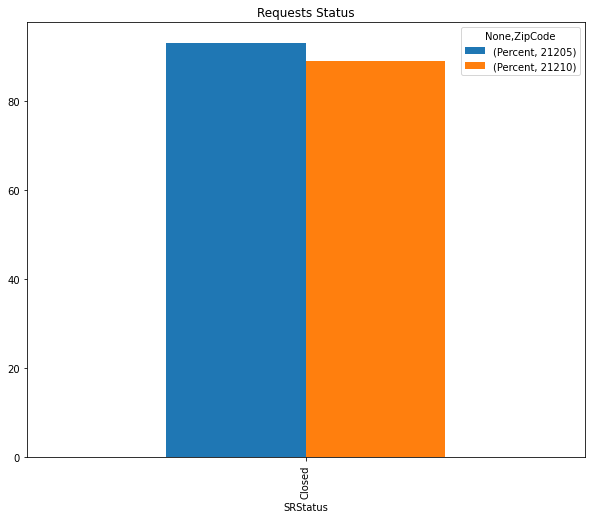

In [774]:
j=df_311_comb['ZipCode'].groupby(                                                 
    df_311_comb['SRStatus']).value_counts().to_frame('Percent')



for i in range(0,len(j)):
    if i%2==0:                        #if i is even (this will be all the 21205 data)
        j['Percent'][i]=(j['Percent'][i]/len(df_311_comb.loc[df_311_comb['ZipCode']=='21205'])*100)  #replace count with percent
        
    else:                             #if i is odd (thi will be all the 21210 data)
        j['Percent'][i]=(j['Percent'][i]/len(df_311_comb.loc[df_311_comb['ZipCode']=='21210'])*100)  #replace count with percent  
        
j[0:2].unstack().plot.bar(figsize=(10,8),                #just plot the closed status percents
   title="Requests Status")

*  Hypothesis is not supported

### Hypothesis 4:  If homeownership rate is higher, there will be more service requests

In [775]:
m=len(df_311_comb.loc[df_311_comb['ZipCode']=='21205'])/df_census['POP100'][0]  #find the number of requests per person in 
n=len(df_311_comb.loc[df_311_comb['ZipCode']=='21210'])/df_census['POP100'][1]  #each zip code
o=df_census['PHOWN'][0]   #pct of homeownership 
p=df_census['PHOWN'][1]   #in each zip

data1=[['21205',m,o],['21210',n,p]]
df1=pd.DataFrame(data1,columns=['ZipCode',"Request Rate",'Homeownership Rate'])  #make a dataframe

df1

ZipCode  Request Rate  Homeownership Rate
0   21205      1.204942                23.0
1   21210      0.317310                38.9

<AxesSubplot:>

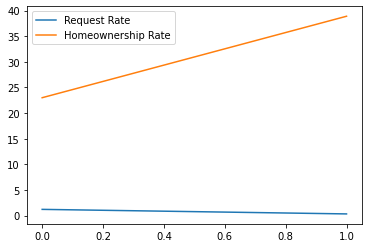

In [776]:
df1.plot()    #plot the df

* Hypothesis is not supported

###  Hypothesis 5:  If percent of vacant units is higher, there will be more service requests

In [777]:
q=df_census['PVACNS'][0]  #pct of vacancies
r=df_census['PVACNS'][1]  #in each zip

data2=[['21205',m,q],['21210',n,r]]
df2=pd.DataFrame(data2,columns=['ZipCode',"Request Rate",'Percent Vacant Units'])

df2


ZipCode  Request Rate  Percent Vacant Units
0   21205      1.204942                  20.3
1   21210      0.317310                   6.6

In [778]:
df2.plot()      #plot the df

<AxesSubplot:>

*  Hypothesis is supported

### Hypothesis 6:  The top request types are different in high SES vs. low SES

Percent of Requests for each Type--21205


<AxesSubplot:xlabel='SRType'>

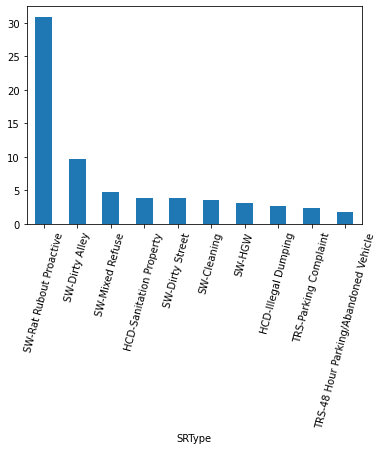

In [779]:
print("Percent of Requests for each Type--21205")

#for zip code 21205, take the number of counts for each unique request type and divide by the total number of requests. 
#*100 to change to percent

s=df_311_comb.loc[df_311_comb['ZipCode']=='21205'].value_counts('SRType')/len(df_311_comb.loc[df_311_comb['ZipCode']=='21205'])*100
s[0:10].plot.bar(rot=75)

Percent of Requests for each Type--21210


<AxesSubplot:xlabel='SRType'>

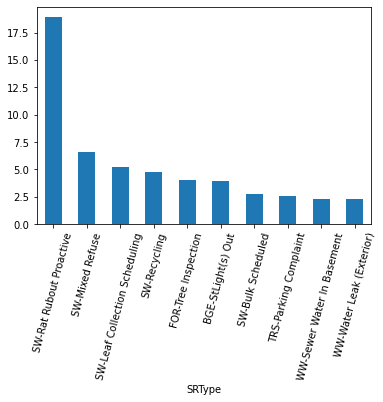

In [780]:
print("Percent of Requests for each Type--21210")

#for zip code 21210, take the number of counts for each unique request type and divide by the total number of requests. 
#*100 to change to percent

t=df_311_comb.loc[df_311_comb['ZipCode']=='21210'].value_counts('SRType')/len(df_311_comb.loc[df_311_comb['ZipCode']=='21210'])*100
t[0:10].plot.bar(rot=75)

*  Hypothesis is partially supported.  While the Proactive Rat Rubout Service, Mixed Refuse, Parking Complaint are common to both, there is a difference based on the zip code.  Dirty Alley, Dirty Street, Sanitation, Illegal Dumping and Abandonded Vehicle in the low SES and Leaf Collection, Tree Inspection, Lights Out, Bulk Trash Scheduled, and Water Issues in the high SES  